# Task 1: Stock Price Prediction By Shabareesh Nair At Grow Intern

# Importing the Libraries and Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\H P\Downloads\AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-09,138.500000,138.550003,134.589996,134.869995,134.297028,74917800
1,2022-11-10,141.240005,146.869995,139.500000,146.869995,146.246033,118854000
2,2022-11-11,145.820007,150.009995,144.369995,149.699997,149.064011,93979700
3,2022-11-14,148.970001,150.279999,147.429993,148.279999,147.650055,73374100
4,2022-11-15,152.220001,153.589996,148.559998,150.039993,149.402573,89868300


# Exploring the whole dataset

In [5]:
df.shape

(252, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,165.260556,166.959286,163.843492,165.511548,165.191758,6.312656e+07
std,18.400179,18.233594,18.571656,18.377774,18.543206,1.898788e+07
min,126.010002,127.769997,124.169998,125.019997,124.488869,3.145820e+07
25%,149.457504,151.270001,147.715000,150.397499,149.930138,5.019445e+07
50%,170.639999,172.224998,168.959999,170.730003,170.730003,5.838675e+07
75%,178.610004,180.157505,177.325004,178.885006,178.879589,7.053645e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.601569e+08


In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.duplicated().sum()

0

# Visualizing the Dataset

In [19]:
# Visualizing the Closing Price Over Time

fig = px.line(df, x = 'Date', y = 'Close', title = 'AAPL Stock Price Over Time', 
              labels = {'Close': 'Close Price (USD)'}, template = 'plotly_dark')
fig.show()

# Displaying A Pie Plot on the basis of Month

In [20]:
# Feature engineering (extracting month from the Date)
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()

# Count the occurrences of each month
month_counts = df['Month'].value_counts()

fig = px.pie(month_counts, values = month_counts.values, names = month_counts.index, 
             title = 'Distribution of Data by Month',
             labels = {'index': 'Month', 'value': 'Count'})

# Show the plot
fig.show()

In [23]:
df.drop('Month', inplace = True, axis = 1)

In [24]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-09,138.500000,138.550003,134.589996,134.869995,134.297028,74917800
1,2022-11-10,141.240005,146.869995,139.500000,146.869995,146.246033,118854000
2,2022-11-11,145.820007,150.009995,144.369995,149.699997,149.064011,93979700
3,2022-11-14,148.970001,150.279999,147.429993,148.279999,147.650055,73374100
4,2022-11-15,152.220001,153.589996,148.559998,150.039993,149.402573,89868300
...,...,...,...,...,...,...,...
247,2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700
248,2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300
249,2023-11-07,179.179993,182.440002,178.970001,181.820007,181.820007,70530000
250,2023-11-08,182.350006,183.449997,181.589996,182.889999,182.889999,49340300


# Feature Engineering

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [26]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2022-11-09,138.500000,138.550003,134.589996,134.869995,134.297028,74917800,2022,11,9
1,2022-11-10,141.240005,146.869995,139.500000,146.869995,146.246033,118854000,2022,11,10
2,2022-11-11,145.820007,150.009995,144.369995,149.699997,149.064011,93979700,2022,11,11
3,2022-11-14,148.970001,150.279999,147.429993,148.279999,147.650055,73374100,2022,11,14
4,2022-11-15,152.220001,153.589996,148.559998,150.039993,149.402573,89868300,2022,11,15
...,...,...,...,...,...,...,...,...,...,...
247,2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700,2023,11,3
248,2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300,2023,11,6
249,2023-11-07,179.179993,182.440002,178.970001,181.820007,181.820007,70530000,2023,11,7
250,2023-11-08,182.350006,183.449997,181.589996,182.889999,182.889999,49340300,2023,11,8


In [27]:
# Creating lag features (past closing prices)

for i in range(1, 6):
    df[f'lag_{i}'] = df['Close'].shift(i)

In [28]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,lag_1,lag_2,lag_3,lag_4,lag_5
0,2022-11-09,138.500000,138.550003,134.589996,134.869995,134.297028,74917800,2022,11,9,NaN,NaN,NaN,NaN,NaN
1,2022-11-10,141.240005,146.869995,139.500000,146.869995,146.246033,118854000,2022,11,10,134.869995,NaN,NaN,NaN,NaN
2,2022-11-11,145.820007,150.009995,144.369995,149.699997,149.064011,93979700,2022,11,11,146.869995,134.869995,NaN,NaN,NaN
3,2022-11-14,148.970001,150.279999,147.429993,148.279999,147.650055,73374100,2022,11,14,149.699997,146.869995,134.869995,NaN,NaN
4,2022-11-15,152.220001,153.589996,148.559998,150.039993,149.402573,89868300,2022,11,15,148.279999,149.699997,146.869995,134.869995,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700,2023,11,3,177.570007,173.970001,170.770004,170.289993,168.220001
248,2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300,2023,11,6,176.649994,177.570007,173.970001,170.770004,170.289993
249,2023-11-07,179.179993,182.440002,178.970001,181.820007,181.820007,70530000,2023,11,7,179.229996,176.649994,177.570007,173.970001,170.770004
250,2023-11-08,182.350006,183.449997,181.589996,182.889999,182.889999,49340300,2023,11,8,181.820007,179.229996,176.649994,177.570007,173.970001


In [29]:
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,lag_1,lag_2,lag_3,lag_4,lag_5
5,2022-11-16,149.130005,149.869995,147.289993,148.789993,148.157883,64218300,2022,11,16,150.039993,148.279999,149.699997,146.869995,134.869995
6,2022-11-17,146.429993,151.479996,146.149994,150.720001,150.079697,80389400,2022,11,17,148.789993,150.039993,148.279999,149.699997,146.869995
7,2022-11-18,152.309998,152.699997,149.970001,151.289993,150.647278,74829600,2022,11,18,150.720001,148.789993,150.039993,148.279999,149.699997
8,2022-11-21,150.160004,150.369995,147.720001,148.009995,147.381195,58724100,2022,11,21,151.289993,150.720001,148.789993,150.039993,148.279999
9,2022-11-22,148.130005,150.419998,146.929993,150.179993,149.541977,51804100,2022,11,22,148.009995,151.289993,150.720001,148.789993,150.039993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700,2023,11,3,177.570007,173.970001,170.770004,170.289993,168.220001
248,2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300,2023,11,6,176.649994,177.570007,173.970001,170.770004,170.289993
249,2023-11-07,179.179993,182.440002,178.970001,181.820007,181.820007,70530000,2023,11,7,179.229996,176.649994,177.570007,173.970001,170.770004
250,2023-11-08,182.350006,183.449997,181.589996,182.889999,182.889999,49340300,2023,11,8,181.820007,179.229996,176.649994,177.570007,173.970001


# Splitting the data into features (X) and target variable (y)

In [31]:
features = ['Year', 'Month', 'Day'] + [f'lag_{i}' for i in range(1, 6)]
X = df[features]
y = df['Close']

In [32]:
print(X[:10])

    Year  Month  Day       lag_1       lag_2       lag_3       lag_4  \
5   2022     11   16  150.039993  148.279999  149.699997  146.869995   
6   2022     11   17  148.789993  150.039993  148.279999  149.699997   
7   2022     11   18  150.720001  148.789993  150.039993  148.279999   
8   2022     11   21  151.289993  150.720001  148.789993  150.039993   
9   2022     11   22  148.009995  151.289993  150.720001  148.789993   
10  2022     11   23  150.179993  148.009995  151.289993  150.720001   
11  2022     11   25  151.070007  150.179993  148.009995  151.289993   
12  2022     11   28  148.110001  151.070007  150.179993  148.009995   
13  2022     11   29  144.220001  148.110001  151.070007  150.179993   
14  2022     11   30  141.169998  144.220001  148.110001  151.070007   

         lag_5  
5   134.869995  
6   146.869995  
7   149.699997  
8   148.279999  
9   150.039993  
10  148.789993  
11  150.720001  
12  151.289993  
13  148.009995  
14  150.179993  


In [33]:
print(y[:10])

5     148.789993
6     150.720001
7     151.289993
8     148.009995
9     150.179993
10    151.070007
11    148.110001
12    144.220001
13    141.169998
14    148.029999
Name: Close, dtype: float64


# Splitting the data into training and testing sets

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scaling the features

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [39]:
print(X_train_scaled[:10])

[[1.         0.45454545 0.96666667 0.90396191 0.89920206 0.88254236
  0.85086856 0.86312686]
 [1.         0.72727273 0.66666667 0.70656598 0.75668501 0.74128523
  0.70597365 0.70986281]
 [1.         0.36363636 0.26666667 0.67870647 0.67968655 0.57076853
  0.59920911 0.60899404]
 [1.         0.63636364 0.93333333 0.77236462 0.75024505 0.71902573
  0.7922609  0.73073688]
 [1.         0.90909091 0.         0.64048729 0.63376727 0.60478796
  0.59130065 0.64485861]
 [1.         0.18181818 0.43333333 0.35629293 0.32871347 0.35797283
  0.39330597 0.37167284]
 [1.         0.45454545 0.66666667 0.83984318 0.83858324 0.8538429
  0.83222703 0.81591483]
 [1.         0.54545455 0.56666667 0.9655608  0.91936168 0.9172616
  0.9144189  0.88274033]
 [1.         0.27272727 0.3        0.554949   0.54234913 0.56852874
  0.58113258 0.55799938]
 [1.         0.45454545 0.93333333 0.89920206 0.88254236 0.84348323
  0.87078085 0.86761001]]


In [40]:
print(X_test_scaled[:10])

[[1.         0.         0.13793103 0.         0.         0.
  0.         0.0144048 ]
 [0.         0.90909091 0.82758621 0.36547857 0.36165912 0.27527405
  0.32435657 0.36294312]
 [1.         0.63636364 0.27586207 0.79041565 0.7745932  0.79263102
  0.9210054  0.95410253]
 [1.         0.18181818 0.75862069 0.4654637  0.49272647 0.41823992
  0.37986237 0.43539058]
 [1.         0.54545455 0.06896552 1.         0.92928123 0.90316687
  0.87447637 0.85086856]
 [1.         0.63636364 0.10344828 0.95858596 0.97234628 1.
  1.         1.        ]
 [1.         0.63636364 0.93103448 0.77281467 0.73901779 0.77938483
  0.7124476  0.71769518]
 [1.         0.27272727 0.62068966 0.59325544 0.57842425 0.53714997
  0.53785157 0.49541034]
 [0.         0.90909091 1.         0.21905039 0.27581738 0.27679668
  0.32106534 0.35531696]
 [1.         0.81818182 0.79310345 0.68983877 0.6886073  0.69320963
  0.69165167 0.73619536]]


# Training the Model using Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

# Predicting the Test Set Results

In [43]:
print('The Predicted Test Result is:\n', model.predict(scaler.fit_transform([[2022, 11, 30, 141.169998, 144.220001, 148.110001, 151.070007, 150.179993]])))

The Predicted Test Result is:
 [127.94499814]


# Merging the Predicted and Actual Training Set 

In [49]:
y_train_pred = model.predict(X_train_scaled)

train_results = pd.DataFrame({
    'Actual Train' : y_train,
    'Predicted Train' : y_train_pred
})

train_results.head(10)

,Actual Train,Predicted Train
159,193.970001,192.394500
216,173.929993,174.127396
123,171.770004,172.414703
200,184.119995,181.553898
245,173.970001,172.623700
84,152.589996,151.809697
152,183.960007,184.829104
170,193.729996,193.800598
102,162.029999,163.388200
158,189.589996,189.804398


# Merging the Predicted and Actual Testing set

In [50]:
y_test_pred = model.predict(X_test_scaled)

test_results = pd.DataFrame({
    'Actual Test' : y_test,
    'Predicted Test' : y_test_pred
})

test_results.head(10)

,Actual Test,Predicted Test
38,125.019997,129.157597
11,148.110001,150.495499
186,178.190002,180.288502
91,158.929993,158.547397
160,192.460007,190.826000
183,181.990005,192.743300
199,180.190002,180.271400
109,167.630005,165.365299
14,148.029999,142.284900
239,173.440002,174.423101


# Evaluating the Model

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean Squared Error of Training set:')
mse_train = mean_squared_error(y_train, y_train_pred)
print('The MSE of Training Set is:\n', mse_train)
print('The R2 Score of Training Set is:\n', r2_score(y_train, y_train_pred))

print()

print('Mean Squared Error of Testing set:')
mse_test = mean_squared_error(y_test, y_test_pred)
print('The MSE of Testing Set is:\n', mse_test)
print('The R2 Score of Testing Set is:\n', r2_score(y_test, y_test_pred))

Mean Squared Error of Training set:
The MSE of Training Set is:
 1.108889844640622
The R2 Score of Training Set is:
 0.9966466440075789

Mean Squared Error of Testing set:
The MSE of Testing Set is:
 6.447391342597729
The R2 Score of Testing Set is:
 0.9815187376158678


# Visualizing The Actual vs Predicted Training Set

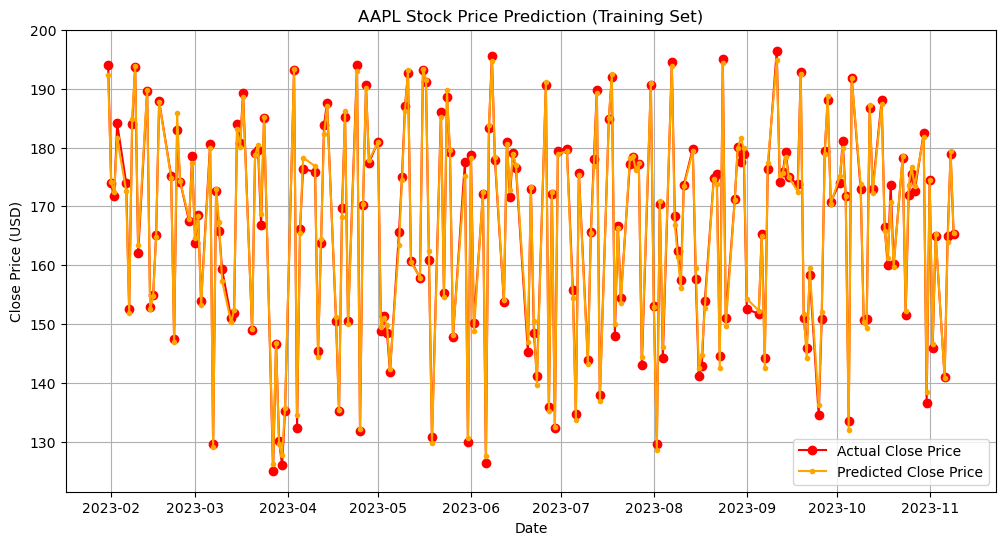

In [70]:
plt.figure(figsize = (12, 6))
plt.plot(df['Date'][-len(y_train):], y_train.values, label = 'Actual Close Price', marker = 'o', color = 'red')
plt.plot(df['Date'][-len(y_train):], y_train_pred, label = 'Predicted Close Price', marker = '.', color = 'orange')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('AAPL Stock Price Prediction (Training Set)')
plt.legend()
plt.grid()
plt.show()

# Visualizing The Actual vs Predicted Testing Set

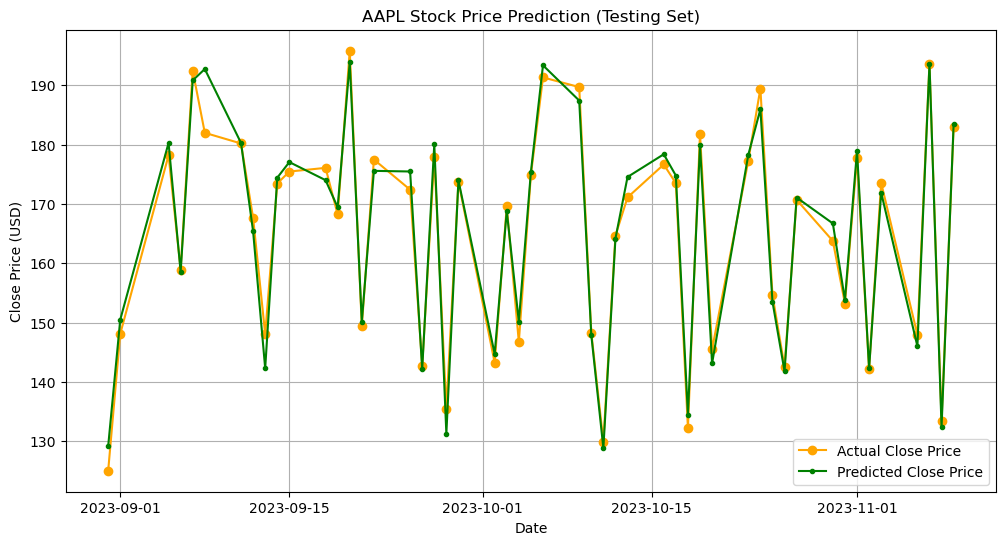

In [68]:
plt.figure(figsize = (12, 6))
plt.plot(df['Date'][-len(y_test):], y_test.values, label = 'Actual Close Price', color = 'orange', marker = 'o')
plt.plot(df['Date'][-len(y_test):], y_test_pred, label = 'Predicted Close Price', color = 'green', marker = '.')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('AAPL Stock Price Prediction (Testing Set)')
plt.legend()
plt.grid()
plt.show()